# Librairies importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Plot_functions import *
from Structure_Learning import *

# Input parameters

In [3]:
# list of operation considered for analysis
op = ['POS_LP1', 'T04', 'T10','T14', 'T05','ZFID04', 'T13', 'POS_ZFID05',
       'ZFID05', 'ZFID09', 'TC1', 'ZFID03', 'T17', 'ZBBK01', 'POS_ZFID04','CO2']

# Distribution

In [4]:
data = pd.read_csv('FRA' + '.csv')

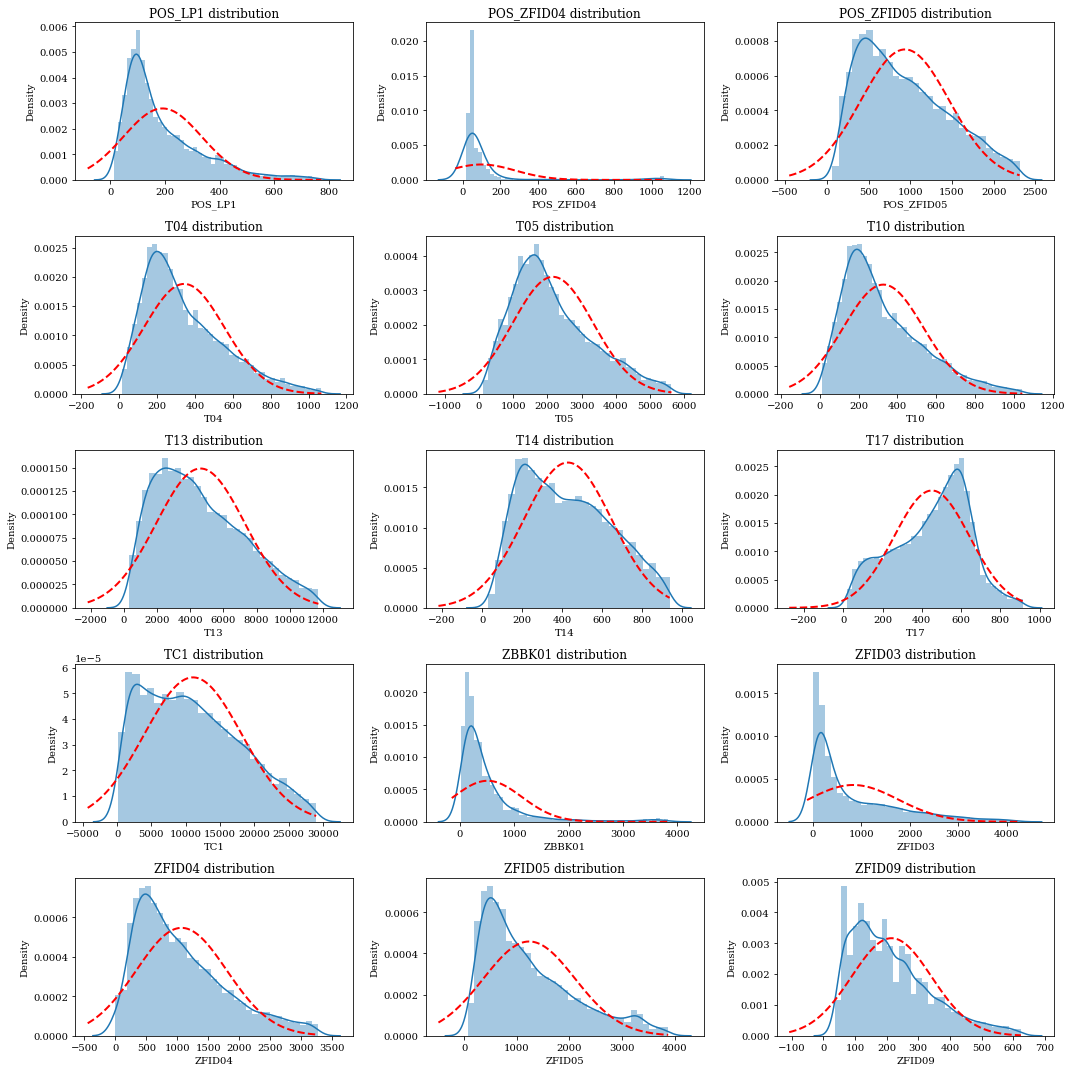

In [6]:
mask = [data['operation'][i] in op for i in data.index] 
data = data[mask]
POS, columns = data_formating(data)

pd_POS = pd.DataFrame(POS)
pd_POS.columns = columns

#  Categorical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))
plt.rc('font', family='serif')

for col in pd_POS.columns:
    plt.subplot(a, b, c)
    plt.title(col + ' distribution')
    plt.xlabel(col)
    variable = pd_POS[pd_POS[col] != 0][col]
    sns.distplot(variable[variable.between(min(variable), variable.quantile(.95))],label='Variable distribution' )
    
    mu, std = norm.fit(variable[variable.between(min(variable), variable.quantile(.95))])
    x = np.linspace(-variable.quantile(.20), variable.quantile(.95), 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p,'--',color='r', linewidth=2,label='Normal approximation')
    c = c + 1


#plt.legend(bbox_to_anchor=(2.5, -0.5))
#plt.legend(loc='upper center')
fig.tight_layout()
plt.show()

# Hypothesis justification

## Normal distribution hypothesis

In [ ]:
# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


### Total sale time repartition

In [ ]:
data = pd.read_csv('FRA' + '.csv')

In [ ]:
variable = np.round(data[data['operation']=='T16']['duration'] * 1e-3)

fig = plt.figure(figsize=(14,5))
plt.rc('font', family='serif')
sns.distplot(variable[variable.between(variable.quantile(.05), variable.quantile(.95))] )
plt.axvline(x= variable.quantile(.50),color='#ff3300', linestyle='--', linewidth=1,
            label='Percentil at 50 % : ' + str(np.round(variable.quantile(.50))) + ' seconds')
plt.title('Total sale time distribution in France',fontsize=16)
plt.xlabel('Sale time duration [Second]',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Average number of measure by time period

In [ ]:
op_T16 = op
op_T16.append('T16')

mask = [data['operation'][i] in op_T16 for i in data.index] 
data = data[mask]
stores = data['store_code'].unique()
data = data[data['store_code'] == stores[0]]
data['date'] = [data['date'][i][:18] for i in data.index]

formated = pd.pivot_table(data, values=['duration'], index=['date'],
                    columns=['operation'], aggfunc= 'count',fill_value=0)
operation = formated.columns
operation = [op[1] for op in operation]
formated.index = pd.to_datetime(formated.index)
formated = formated.groupby(pd.Grouper(freq='124 S')).sum()
formated = formated.dropna(axis=0)

formated = formated[formated[('duration','T16')] != 0]

In [ ]:
variable = formated[('duration','T16')]

fig = plt.figure(figsize=(14,5))
plt.rc('font', family='serif')
sns.distplot(variable[variable.between(variable.quantile(.05), variable.quantile(.95))] )
#plt.hist(variable,align='left',bins=[1, 2, 3, 4])
plt.axvline(x= variable.quantile(.5),color='#ff3300', linestyle='--', linewidth=1,
            label='Percentil at 50 % : ' + str(np.round(variable.quantile(.5))) + ' sales')
plt.title('Number of sale by period in France',fontsize=16)
plt.xlabel('Number of sale per period',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Data quantity repartition by country

In [ ]:
# list of operation considered for analysis
op = ['POS_LP1','T02','T03','T04','T06','T08','T10','T14','X01']

# list of countries in analysis
Countries = ['ESP','GBR','ZAF','CHE','ITA','FRA','BEL','NOR','DEU']

In [ ]:
Size = []
for c in Countries:
    data = pd.read_csv(c + '.csv')
    mask = [data['operation'][i] in op for i in data.index] 
    data = data[mask]
    Size.append(data.shape[0])

In [ ]:
plt.figure(figsize=(25, 10))
plt.rc('font', family='serif')
plt.bar(Countries, Size)

plt.show()